# IDMS Discplacement data.

(source: http://www.internal-displacement.org/database/displacement-data)

Consists of two datasets:
1. Displacement figures by country
2. Disaster-related new displacements by event

<font color = "red">Currently all paths correspond to my local computer!</font>

<font color = "red">**QUESTIONS**</font>
1. What does **#affected+idps+ind+newdisp+disaster** mean?

In [1]:
import os 
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

A diagram with general overview of available datasources is provided below:

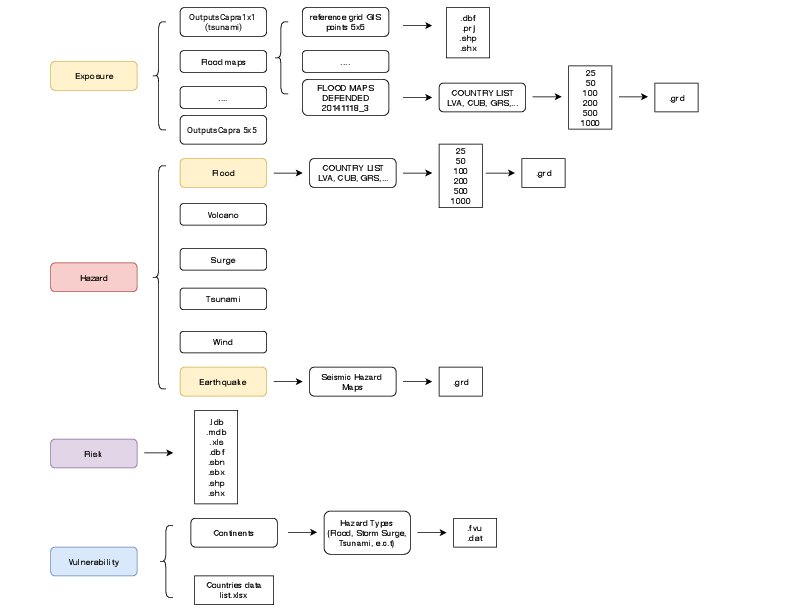

In [6]:
import os

from wand.image import Image as WImage
img = WImage(filename='/Users/sychevaa/Desktop/Hack4Good/GitLabRepository/captain-obvious/data/IDMS_Data_Overview.pdf')
img

**Load the data**

In [28]:
filename_displ_country = "/Users/sychevaa/Desktop/Hack4Good/idmc_displacement_all_dataset.xlsx"
filename_displ_event = "/Users/sychevaa/Desktop/Hack4Good/GitLabRepository/captain-obvious/data/idms_displacement/idmc_disaster_all_dataset.xlsx"

displace_all = pd.read_excel(filename_displ_country, header=[0,1])
disaster_all = pd.read_excel(filename_displ_event, header=[0,1])

## Displacement figures by country

In [13]:
displace_all.head(5)

ISO3          Name       Year       Conflict Stock Displacement  \
  #country+code #country+name #date+year #affected+idps+ind+stock+conflict   
0           AB9    Abyei Area       2014                           20000.0   
1           AB9    Abyei Area       2015                           82000.0   
2           AB9    Abyei Area       2016                           20000.0   
3           AB9    Abyei Area       2017                           31000.0   
4           AB9    Abyei Area       2018                           31000.0   

           Conflict New Displacements          Disaster New Displacements  
  #affected+idps+ind+newdisp+conflict #affected+idps+ind+newdisp+disaster  
0                                 NaN                                 NaN  
1                                 NaN                                 NaN  
2                                 NaN                                 NaN  
3                                 NaN                                 NaN  
4                               150.0                                 2.0

t.b.c.

## Disaster-related new displacements by event

**FIRST SUMMARY**

In [12]:
disaster_all.head(5)

ISO3          Name       Year  Start Date  \
  #country+code #country+name #date+year #date+start   
0           AB9    Abyei Area       2018  2018-07-01   
1           AFG   Afghanistan       2008  2008-01-01   
2           AFG   Afghanistan       2008  2008-08-01   
3           AFG   Afghanistan       2008  2008-04-17   
4           AFG   Afghanistan       2009  2009-01-01   

                  Event Name  Hazard Category          Hazard Type  \
                #description #crisis+category         #crisis+type   
0  Abyie: Flood - 01/07/2018  Weather related                Flood   
1                       None  Weather related  Extreme temperature   
2                       None  Weather related                Flood   
3                       None      Geophysical           Earthquake   
4                       None  Weather related                Flood   

                    New Displacements  
  #affected+idps+ind+newdisp+disaster  
0                                 2.0  
1                                 NaN  
2                               180.0  
3                              3250.0  
4                             25185.0

**Q:** What period does our data cover?

In [102]:
DataFrame(disaster_all.groupby([('Year', '#date+year')]).count()[('ISO3', '#country+code')])

ISO3
                   #country+code
(Year, #date+year)              
2008                         221
2009                         262
2010                         355
2011                         295
2012                         211
2013                         644
2014                         696
2015                         599
2016                         593
2017                         943
2018                        1612

**Available Information:**

In [10]:
disaster_all.columns.values

array([('ISO3', '#country+code'), ('Name', '#country+name'),
       ('Year', '#date+year'), ('Start Date', '#date+start'),
       ('Event Name', '#description'),
       ('Hazard Category', '#crisis+category'),
       ('Hazard Type', '#crisis+type'),
       ('New Displacements', '#affected+idps+ind+newdisp+disaster')],
      dtype=object)

**Number of observations:**

In [11]:
len(disaster_all)

6431

**Filter:** Delete events without information on the number of displaced people:
(-518)

In [32]:
disaster_all_filt1 = disaster_all.loc[disaster_all[('New Displacements', '#affected+idps+ind+newdisp+disaster')].isnull()==False ]
msg = "Excluded {} events".format(len(disaster_all) - len(disaster_all_filt1))
print(msg)

Excluded 581 events


**Q:** what is the difference between event category and event type ?

1. **15** unique combinations of category and hazard type in the dataset
3. **(wet) mass movement** can be classified as both **geophisical** and **weather related**

**NB** first need to format the strings

In [29]:
EVENT_CHAR = [('Hazard Category', '#crisis+category'), ('Hazard Type', '#crisis+type')]

for name in EVENT_CHAR:
    disaster_all_filt1[name] = [str(x).title().strip() for x in disaster_all_filt1[name]]


In [19]:
categ_type = disaster_all_filt1.drop_duplicates(EVENT_CHAR)
categ_type[EVENT_CHAR].sort_values(EVENT_CHAR[0])

Hazard Category              Hazard Type
     #crisis+category             #crisis+type
3         Geophysical               Earthquake
53        Geophysical        Dry Mass Movement
235       Geophysical        Volcanic Eruption
775       Geophysical        Volcanic Activity
1100      Geophysical            Mass Movement
4654      Geophysical        Wet Mass Movement
503              None                     None
0     Weather Related                    Flood
14    Weather Related      Extreme Temperature
18    Weather Related        Wet Mass Movement
47    Weather Related                    Storm
135   Weather Related                  Drought
258   Weather Related                 Wildfire
562   Weather Related            Mass Movement
4047  Weather Related  Severe Winter Condition

In [16]:
#len(categ_type[EVENT_CHAR])

15

**GROUP BY EVENT TYPE**

In [51]:
#disaster_all_filt1[('Hazard Type', '#crisis+type')] = list(map(lambda x: str(x).title(), disaster_all_filt1[('Hazard Type', '#crisis+type')] ))
disaster_event_group = disaster_all_filt1.groupby([('Hazard Type', '#crisis+type')])

**Q1:** What ***category*** of hazard types are present?

In [57]:
q1 = DataFrame(disaster_event_group.count()[('Hazard Category', '#crisis+category')].sort_values())
q1#.head(10)

Hazard Category
                            #crisis+category
(Hazard Type, #crisis+type)                 
Severe winter condition                    1
Wet Mass Movement                          1
Wet Mass movement                          1
Drought                                   13
Volcanic activity                         13
Mass movement                             30
Extreme temperature                       44
Volcanic eruption                         62
Dry mass movement                         93
Earthquake                               277
Wet mass movement                        472
Wildfire                                 506
Storm                                   1509
Flood                                   2825

**Q2:** What type of events results in largest displacement?

In [22]:
DataFrame(disaster_event_group.agg(np.max)['Year']).sort_values(by = 'Year',ascending=False)#.columns.values#['Year'] # WHY YEAR ?

Year
(Hazard Type, #crisis+type)            
Flood                        15200000.0
Earthquake                   15000000.0
Storm                         4095280.0
Drought                        891857.0
Extreme Temperature            827000.0
Wet Mass Movement              400000.0
Volcanic Eruption              360557.0
Wildfire                       203700.0
Dry Mass Movement               26093.0
Volcanic Activity               13304.0
Mass Movement                    3600.0
Severe Winter Condition           807.0
None                              630.0

**Q3:** What is the average displacement per event type?

In [105]:
q3 = disaster_event_group.mean()[[('New Displacements', '#affected+idps+ind+newdisp+disaster')]].sort_values(by = ('New Displacements', '#affected+idps+ind+newdisp+disaster'),ascending=False) 
q3.head(10)

New Displacements
                            #affected+idps+ind+newdisp+disaster
(Hazard Type, #crisis+type)                                    
Drought                                           157218.000000
Earthquake                                        117178.722022
Storm                                              60733.343274
Flood                                              47537.920354
Extreme Temperature                                24391.772727
Volcanic Eruption                                  19100.967742
Wildfire                                            3190.583004
Volcanic Activity                                   2491.846154
Wet Mass Movement                                   1881.675105
Dry Mass Movement                                    893.634409

**GROUP BY COUNTRY**

In [53]:
disaster_country_group = disaster_all_filt1.groupby([('Name', '#country+name')])

**Q4:** What country has the highest number of events?

In [54]:
q6 = DataFrame(disaster_country_group.count()[('Hazard Type', '#crisis+type')].sort_values(ascending=False))
q6.head(10)

Hazard Type
                      #crisis+type
(Name, #country+name)             
Indonesia                      766
United States                  429
Colombia                       415
China                          369
Philippines                    209
Nepal                          173
Afghanistan                    159
Malaysia                       150
Myanmar                        130
Sri Lanka                      124

**Q5** What country has the largest number of displaced people?

In [84]:
#q5 = DataFrame(disaster_country_group.sum()[('Hazard Type', '#crisis+type')].sort_values(ascending=False))
q5 = DataFrame(disaster_country_group.sum()[('New Displacements', '#affected+idps+ind+newdisp+disaster')].sort_values(ascending=False)) #[('Hazard Type', '#crisis+type')]

q5.head(10)

New Displacements
                      #affected+idps+ind+newdisp+disaster
(Name, #country+name)                                    
China                                          77638588.0
India                                          39639411.0
Philippines                                    39469642.0
Pakistan                                       15586239.0
Nigeria                                         7851769.0
United States                                   7300190.0
Bangladesh                                      6894681.0
Cuba                                            5953344.0
Indonesia                                       5634894.0
Myanmar                                         5526496.0

**GROUP BY COUNTRY AND EVENT TYPE**

In [96]:
pd.pivot_table(disaster_all_filt1,
               values = [('New Displacements', '#affected+idps+ind+newdisp+disaster')],
               index=[('Name', '#country+name'), ('Hazard Type', '#crisis+type')],
             aggfunc=np.sum)

New Displacements
                                                  #affected+idps+ind+newdisp+disaster
(Name, #country+name) (Hazard Type, #crisis+type)                                    
Abyei Area            Flood                                                       2.0
Afghanistan           Drought                                                371318.0
                      Dry Mass Movement                                         407.0
                      Earthquake                                              77579.0
                      Extreme Temperature                                      4369.0
                      Flood                                                  232092.0
                      Storm                                                     284.0
                      Wet Mass Movement                                       18291.0
Albania               Earthquake                                                150.0
                      Flood                                                   10755.0
                      Wet Mass Movement                                         581.0
Algeria               Earthquake                                               4492.0
                      Flood                                                   49271.0
American Samoa        Storm                                                    4600.0
Angola                Flood                                                  447337.0
                      Storm                                                    3640.0
Anguilla              Storm                                                     500.0
Antigua and Barbuda   Storm                                                    1468.0
Argentina             Earthquake                                                 48.0
                      Flood                                                  120889.0
                      Storm                                                    8750.0
                      Volcanic Eruption                                         600.0
                      Wet Mass Movement                                        2220.0
                      Wildfire                                                  199.0
Australia             Flood                                                   21189.0
                      Storm                                                   53224.0
                      Wet Mass Movement                                           3.0
                      Wildfire                                                26125.0
Austria               Extreme Temperature                                        25.0
                      Flood                                                    1066.0
...                                                                               ...
Vanuatu               Earthquake                                                 11.0
                      Flood                                                     200.0
                      Storm                                                   69739.0
                      Volcanic Eruption                                       23159.0
                      Wet Mass Movement                                         640.0
Venezuela             Flood                                                   33783.0
Venezuela, RB         Flood                                                  153088.0
Viet Nam              Flood                                                   48159.0
                      Storm                                                  728206.0
                      Wet Mass Movement                                         145.0
Vietnam               Flood                                                  474793.0
                      Storm                                                 1702922.0
Virgin Islands        Storm                                                    2311.0
West Bank and Gaza    Extr

**WHAT ARE THE NAME OF THE EVENTS?**

**Q6:** for how many events we do not know event names? - **705**

In [33]:
var_name = ('Event Name', '#description')

disaster_all_filt1.loc[disaster_all_filt1[var_name].isnull() == False, var_name] = [str(x).title().strip() 
                                                            for x in 
                                                      disaster_all_filt1.loc[disaster_all_filt1[var_name].isnull() == False, var_name]]

/Users/sychevaa/anaconda3/envs/climada_env/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [34]:
val1 = sum(disaster_all_filt1[('Event Name', '#description')].isnull())
val2 = sum(disaster_all_filt1[('Event Name', '#description')].isnull()==False)
msg = "For records {} no event name\nRemains: {}".format(val1, val2)
print(msg)

For records 705 no event name
Remains: 5145


**Q**   How many people were displaced due to events with unknown name? <br>
**128607190** $\Rightarrow$ we can't really ignore them

In [70]:
sum(disaster_all_filt1.loc[disaster_all_filt1[var_name].isnull() == True,
                           ('New Displacements', '#affected+idps+ind+newdisp+disaster')])

128607190.0

In [78]:
sum(disaster_all_filt1[('New Displacements', '#affected+idps+ind+newdisp+disaster')])

265330939.0

In [40]:
disaster_all_filt1[var_name].value_counts(ascending=False)

15 Countries - Hurricane Irma - 27/08/2017                                                                                             16
Hurricane Matthew                                                                                                                      11
China, Guam, Northern Mariana Islands, Philippines, Thailand: Typhoon Mangkhut - 7/9/2018                                               7
Monsoon Floods                                                                                                                          6
Cambodia, Laos, Thailand, Philippines, Vietnam: Southwest Monsoon (Habagat) / Tropical Cyclone Son-Tinh / Henry / Josie - 15/7/2018     6
Cyclone Pam                                                                                                                             5
Jakarta Floods                                                                                                                          5
Guatemala, Honduras, Nicaragua, Co

**Q9:** Do we have only 1 entry for every event? - **No: difference of 309 events**


1. One hazard event can have up to **16** entries: Hurricane Irma
2. Hurricane Matthew - **11** countries
3. ...


In [35]:
len1 = len(np.unique(disaster_all_filt1[('Event Name', '#description')].dropna()))
len2 = len(disaster_all_filt1[('Event Name', '#description')].dropna())

assert len1==len2, "{} != {} difference of {}".format(len1, len2, len2-len1)

AssertionError: 4836 != 5145 difference of 309

In [43]:
#disaster_all_filt1[('Event Name', '#description')].head(40)

## GDACS data scrapping

1. concentrate on earthquakes
2. what is **dailymap**?


Earthquake characteristids:
1. Magnitude 
2. Location ? (not always present)
3. Depth 

In [58]:
displace_eq = disaster_all_filt1.loc[disaster_all_filt1[('Hazard Type', '#crisis+type')] == "Earthquake"]
displace_st = disaster_all_filt1.loc[disaster_all_filt1[('Hazard Type', '#crisis+type')] == "Storm"]
displace_fl = disaster_all_filt1.loc[disaster_all_filt1[('Hazard Type', '#crisis+type')] == "Flood"]

In [63]:
displace_eq.columns.values

array([('ISO3', '#country+code'), ('Name', '#country+name'),
       ('Year', '#date+year'), ('Start Date', '#date+start'),
       ('Event Name', '#description'),
       ('Hazard Category', '#crisis+category'),
       ('Hazard Type', '#crisis+type'),
       ('New Displacements', '#affected+idps+ind+newdisp+disaster')],
      dtype=object)

In [68]:
QUERY_INFO = [('Name', '#country+name'),
       ('Start Date', '#date+start'),
       ('Event Name', '#description')]

QUERY_INFO_2 = QUERY_INFO + [('New Displacements', '#affected+idps+ind+newdisp+disaster')]

In [69]:
displace_eq.sort_values([('New Displacements', '#affected+idps+ind+newdisp+disaster')], 
                        ascending=False)[QUERY_INFO_2].head(20)

Name  Start Date  \
     #country+name #date+start   
813          China  2008-12-05   
4409         Nepal  2015-04-25   
759          Chile  2010-01-01   
2329         Haiti  2010-01-01   
776          Chile  2015-09-16   
771          Chile  2014-04-01   
882          China  2013-04-20   
2389     Indonesia  2009-01-01   
4651      Pakistan  2015-10-26   
797          China  2008-08-30   
3393         Japan  2011-01-01   
3065     Indonesia  2018-07-29   
828          China  2009-01-01   
4890   Philippines  2013-10-15   
1878       Ecuador  2016-04-16   
5616        Turkey  2011-01-01   
3064     Indonesia  2018-09-28   
923          China  2014-08-03   
900          China  2013-07-22   
4626      Pakistan  2013-09-24   

                                             Event Name  \
                                           #description   
813                                                None   
4409                                  Gorkha Earthquake   
759                                                None   
2329                                               None   
776                      Illapel Earthquake And Tsunami   
771                          Iquique Earthquake-Tsunami   
882                                   Lushan Earthquake   
2389                                               None   
4651                    Northern Afghanistan Earthquake   
797                                                None   
3393                                               None   
3065  Indonesia: Earthquakes - Lombok - 29/7 - 5/8 -...   
828                                                None   
4890                                   Bohol Earthquake   
1878            Northwestern Ecuador Earthquake (April)   
5616                                               None   
3064  Indonesia: Earthquake / Tsunami - Palu, Dongga...   
923                                   Ludian Earthquake   
900                                    Gansu Earthquake   
4626                Baluchistan Earthquakes (September)   

                       New Displacements  
     #affected+idps+ind+newdisp+disaster  
813                           15000000.0  
4409                           2622733.0  
759                            2000000.0  
2329                           1500000.0  
776                            1000000.0  
771                             972457.0  
882                             694800.0  
2389                            675500.0  
4651                            665812.0  
797                             650000.0  
3393                            492000.0  
3065                            445343.0  
828                             400000.0  
4890                            348507.0  
1878                            259000.0  
5616                            252000.0  
3064                            247900.0  
923                             236900.0  
900                             226700.0  
4626                            205619.0

**FIND relevant information for earthquake on 2008-12-05 in China**

In [75]:
displace_st.loc[displace_st[('Year', '#date+year')] == 2017]

ISO3                            Name       Year  Start Date  \
     #country+code                   #country+name #date+year #date+start   
94             AFG                     Afghanistan       2017  2017-02-19   
184            AGO                          Angola       2017  2017-09-17   
189            AGO                          Angola       2017  2017-11-05   
190            AGO                          Angola       2017  2017-09-27   
204            AIA                        Anguilla       2017  2017-08-27   
279            ATG             Antigua and Barbuda       2017  2017-08-27   
328            AUS                       Australia       2017  2017-03-28   
329            AUS                       Australia       2017  2017-08-19   
333            AUS                       Australia       2017  2017-02-20   
378            BDI                         Burundi       2017  2017-03-01   
380            BDI                         Burundi       2017  2017-03-01   
385            BDI                         Burundi       2017  2017-10-01   
387            BDI                         Burundi       2017  2017-07-01   
391            BDI                         Burundi       2017  2017-05-01   
498            BGD                      Bangladesh       2017  2017-04-03   
500            BGD                      Bangladesh       2017  2017-05-28   
531            BHS                         Bahamas       2017  2017-08-27   
646            BWA                        Botswana       2017  2017-02-18   
1003           CHN                           China       2017  2017-08-11   
1007           CHN                           China       2017  2017-06-12   
1008           CHN                           China       2017  2017-08-30   
1011           CHN                           China       2017  2017-08-27   
1014           CHN                           China       2017  2017-06-06   
1017           CHN                           China       2017  2017-10-09   
1018           CHN                           China       2017  2017-09-07   
1022           CHN                           China       2017  2017-08-11   
1027           CHN                           China       2017  2017-10-11   
1029           CHN                           China       2017  2017-08-17   
1030           CHN                           China       2017  2017-07-13   
1031           CHN                           China       2017  2017-08-06   
...            ...                             ...        ...         ...   
5978           USA                   United States       2017  2017-04-30   
5991           USA                   United States       2017  2017-10-23   
5995           USA                   United States       2017  2017-08-25   
6005           USA                   United States       2017  2017-04-04   
6009           USA                   United States       2017  2017-01-21   
6017           USA                   United States       2017  2017-02-07   
6018           USA                   United States       2017  2017-08-27   
6214           VCT  St. Vincent and the Grenadines       2017  2017-07-18   
6229           VGB          British Virgin Islands       2017  2017-08-27   
6230           VIR                  Virgin Islands       2017  2017-09-16   
6231           VIR                  Virgin Islands       2017  2017-08-27   
6284           VNM                        Viet Nam       2017  2017-09-11   
6285           VNM                        Viet Nam       2017  2017-07-21   
6286           VNM                        Viet Nam       2017  2017-11-04   
6289           VNM                        Viet Nam       2017  2017-11-18   
6290           VNM                        Viet Nam       2017  2017-07-14   
6291           VNM                        Viet Nam       2017  2017-12-22   
6292           VNM                        Viet Nam       2017  2017-08-19   
6321           VUT                         Vanuatu       2017  2017-04-06   
6322      